# NodeArc Indicence Project 
## Quinn Kelly

In [1]:
from math import *
import numpy as np
from scipy.linalg import lu_factor, lu_solve
from scipy.linalg import qr, solve_triangular
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.linalg import null_space
import schemdraw
import schemdraw.elements as elm

$$ \begin{pmatrix} A & R\cr 0 & A^T\cr\end{pmatrix} \begin{pmatrix} v\cr c\cr\end{pmatrix} = 0 $$

### reading the file and creating the node arc matrix

In [2]:
file = open('final2023.txt', "r")
lines = file.readlines()
numnodes = int(lines[0])
nodedictionary = {}
nodes = []

for k in range(numnodes):
    items = lines[k + 1].split()
    nodedictionary[items[0]] = [k, float(items[1]), float(items[2])]
    nodes.append(items[0])  
    
revdictionary = {}
for item in nodedictionary: 
    revdictionary[nodedictionary[item][0]] = item
    
edges = int(lines[numnodes + 1])
Nodearc = np.zeros((edges, numnodes))

resdict = {}
resistance = np.zeros(edges)
for k in range (edges):
    node1, node2, ohm = lines[numnodes + 2 + k].split(" ") #split at each space, not each letter
    Nodearc[k, nodedictionary[node1][0]] = -1
    Nodearc[k, nodedictionary[node2][0]] = 1
    resistance[k] = float(ohm)
    resdict[k] = ohm

res_matrix = np.diag(resistance)

print('Node Arc Incidence Matrix')
print(Nodearc)
print('Resistance Matrix')
print(res_matrix)

Node Arc Incidence Matrix
[[-1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

### setting up the voltage value and sinknode

In [3]:
sinknode = (lines[-1].split(" ")[0]).replace('\n', '')
# takes last line of code, sinknode, splits from the data
print('sinknode:', sinknode)
H = nodedictionary[sinknode]

sinknode: SSW1


### solving the matrix

In [4]:
V = lines[-2].split(' ')
vnode = V[0]
V = int(V[1]) #reading and assigning the variable to the voltage (used in schematics)

nodearc = np.delete(Nodearc, [int(nodedictionary.get(vnode)[0]), int(nodedictionary.get(sinknode)[0])], axis = 1) # deletes column that matches volt. node
#np.delete(nodearc, int(nodedictionary.get(sinknode)[0]), axis = 1) # deletes column that matches sink
At = nodearc.T
A = np.block([[nodearc, res_matrix], [np.zeros((nodearc.shape[1], nodearc.shape[1])), At]])

# setting up np.block to create matrix that is square and combines everything that we need into one unit
# nodarc.shape[1] is used to get the row length of nodearc and the column length of At in order to create the
# proper square to fill in the np.block and let it function correctly

b = np.zeros(numnodes + edges - 2)
b[:edges] = b[:edges] - Nodearc[:, int(nodedictionary.get(vnode)[0])] * V

lupiv = lu_factor(A)
xran = lu_solve((lupiv), b)

### adding back in the sinknode to the voltage and currents vectors ###
ans = xran[:revdictionary.get(vnode)]
ans = np.append(ans, V)
ans = np.append(ans, xran[int(nodedictionary.get(vnode)[0]):nodedictionary.get(sinknode)[0]-1])
ans = np.append(ans, 0)
ans = np.append(ans, xran[nodedictionary.get(sinknode)[0] -1: numnodes -2])

voltages = ans[:len(nodearc[0]) - 2]
currents = ans[len(nodearc[0]) - 2:]

print('voltages and currents:')
print(ans)
print('voltages:')
print(voltages)
print('currents:')
print(currents)

voltages and currents:
[ 7.23924706  5.62126098  4.31137381  2.68031686  3.52992294  6.40271184
  5.34188924  4.95371335  5.00506316  4.95371335  4.77883669  4.95371335
  4.84419101  4.95371335  4.95371335  0.32359722  0.26197743  0.32621139
  0.53606337 -0.70598459 -0.57455778 -0.71945763  0.55215059  0.19408795
 -0.02567491  0.02567491  0.08743833 -0.08743833  0.05476117 -0.05476117
 -0.19408795  0.22855337  0.06161978 -0.06423395 -0.20985198 -0.49537133
 -0.13142681  0.14489985  0.46581108  0.07763518  0.44831623  0.01026996
 -0.12599737 -0.03497533 -0.63757083 -0.02190447  0.28422663 10.
  0.          2.68031686  3.52992294  6.40271184  5.34188924  4.95371335
  5.00506316  4.95371335  4.77883669  4.95371335  4.84419101  4.95371335
  4.95371335]
voltages:
[7.23924706 5.62126098 4.31137381 2.68031686 3.52992294 6.40271184
 5.34188924 4.95371335 5.00506316 4.95371335 4.77883669 4.95371335
 4.84419101]
currents:
[ 4.95371335  4.95371335  0.32359722  0.26197743  0.32621139  0.53606337
 

### creating the schematic

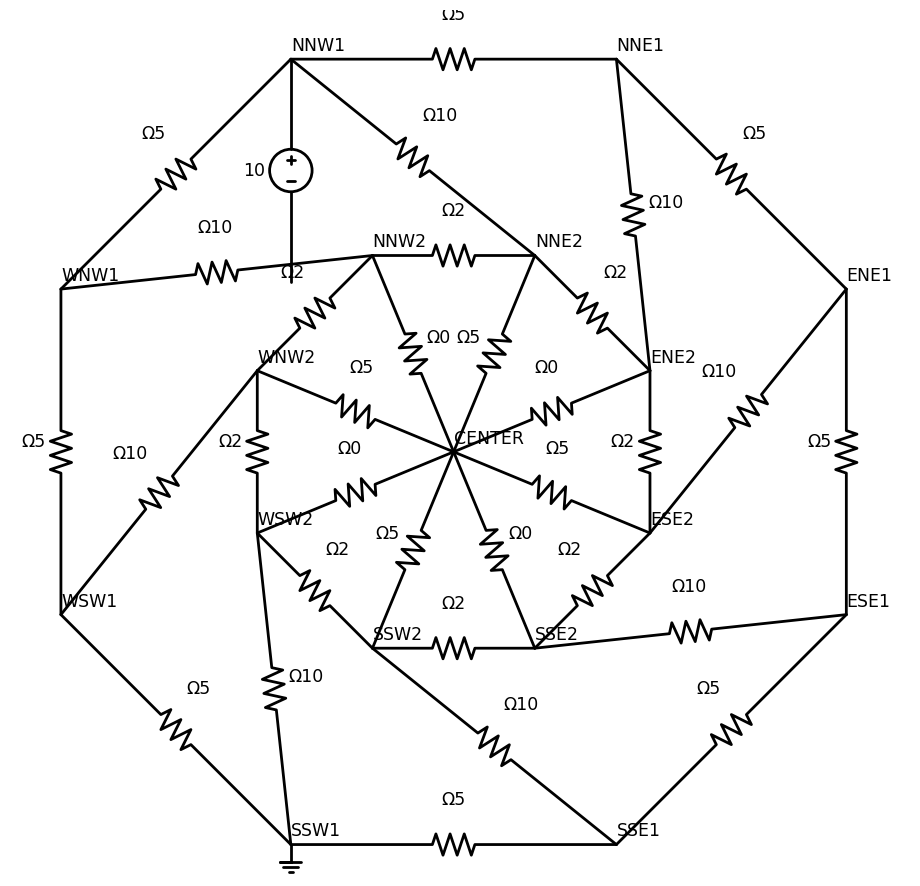

In [5]:
schematic = schemdraw.Drawing()
schematic += elm.SourceV().endpoints((nodedictionary.get(vnode)[1], 4), (nodedictionary.get(vnode)[1], nodedictionary.get(vnode)[2])).label(str(V))
schematic += elm.Ground().at((nodedictionary.get(sinknode)[1:]))

### creating the points ###
for k in range(numnodes):
    schematic += elm.Line().endpoints((nodedictionary[revdictionary[k]][1:]), (nodedictionary[revdictionary[k]][1:])).label(str(revdictionary[k]), halign='left')

### creating the resisters and naming ###
for k in range(edges):
    for l in range(numnodes):
        if Nodearc[k, l] == -1:
            startingnode = nodedictionary[revdictionary[l]][1:]
        if Nodearc[k, l] == 1:
            endingnode = nodedictionary[revdictionary[l]][1:]
    schematic += elm.Resistor().endpoints(startingnode, endingnode).label('\u03A9{}'.format(resdict[k]))

schematic.draw()